<a href="https://colab.research.google.com/github/sss4920/machinelearning_study/blob/main/03_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3], [4,5,6])) #열을 쌓는다.

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
np.row_stack(([1,2,3], [4,5,6]))

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
fish_data = np.column_stack((fish_length,fish_weight))

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [9]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [10]:
fish_target.shape

(49,)

In [11]:
np.concatenate((np.ones(3), np.zeros(3)))

array([1., 1., 1., 0., 0., 0.])

In [12]:
np.column_stack((np.ones(3), np.zeros(3)))

array([[1., 0.],
       [1., 0.],
       [1., 0.]])

In [13]:
np.row_stack((np.ones(3), np.zeros(3)))

array([[1., 1., 1.],
       [0., 0., 0.]])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_input,test_input, train_target,test_target = train_test_split(fish_data,fish_target, random_state=42) 

In [16]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [17]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [18]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
35/49, 14/49

(0.7142857142857143, 0.2857142857142857)

In [20]:
10/13, 3/13 # 이처럼 샘플링 편향이 있다. train_test_split은 3:1로 쪼개는게 디폴트

(0.7692307692307693, 0.23076923076923078)

In [21]:
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42) #stratify를 이용하여 타겟데이터의 클래스에 맞게 쪼갬.

In [22]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
print(kn.predict([[25,150]])) # 2차원으로 넣기!

[0.]


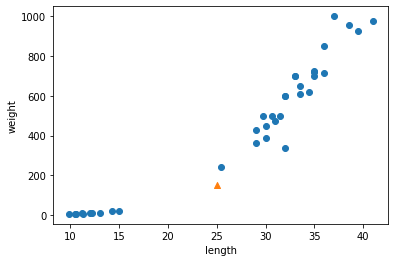

In [25]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
distances, indexes = kn.kneighbors([[25,150]]) # 특정한 입력에 대한 가장 가까운애들의 인덱스와 거리를 제공해준다.

In [27]:
distances, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]), array([[21, 33, 19, 30,  1]]))

In [28]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


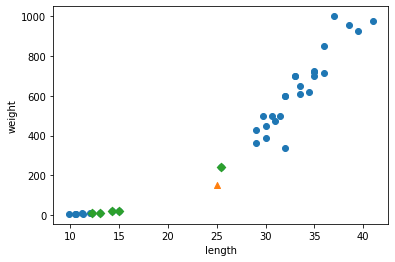

In [29]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [31]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [32]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [33]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


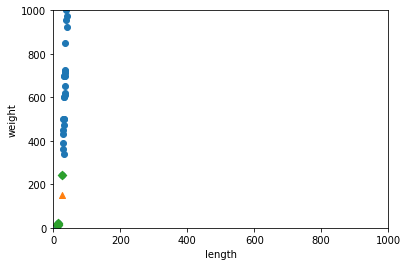

In [34]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.ylim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
mean = np.mean(train_input, axis=0) #훈련데이터 총 36개 길이끼리의 평균을 구하고, 무게끼리의 평균을 구해야함. 배열을 볼때 세로 부터 봄.
std = np.std(train_input, axis=0)

In [36]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [37]:
train_scaled = (train_input - mean) / std # 브로드 캐스팅 연산

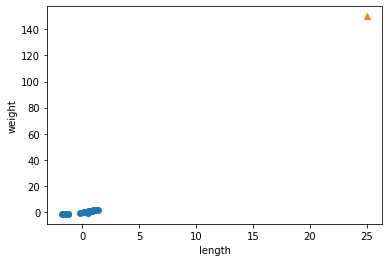

In [38]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

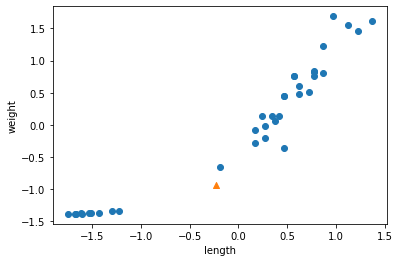

In [39]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [41]:
test_scaled = (test_input - mean)/std

In [42]:
kn.score(test_scaled, test_target)

1.0

In [43]:
print(kn.predict([new]))

[1.]


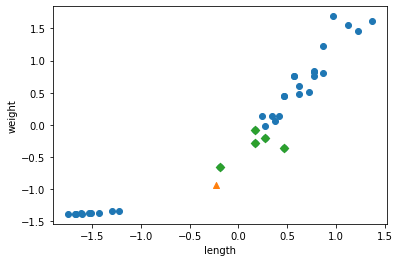

In [44]:
_, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()